# Smoothing a Graph

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MglEfisPlotter import *

In [2]:
datafile = '../data/IEFISBB.DAT'
minTimestamp = 429600874
maxTimestamp = 1000000000

flights = createFlights(datafile, minTimestamp, maxTimestamp)
f = flights[-1]

## Raw Data

The raw data has multiple datapoints per second (per timestamp) and timestamps almost every second (almost 60 per minute).

In [3]:
vsi = pd.DataFrame(f.listData('vsi'))
vsi.head(10)

,minutes,timestamp,vsi
0,0.000000,479912852,-267
1,0.000000,479912852,-267
2,0.066667,479912856,494
3,0.066667,479912856,853
4,0.066667,479912856,853
5,0.133333,479912860,1377
6,0.133333,479912860,1391
7,0.166667,479912862,1387
8,0.166667,479912862,1387
9,0.233333,479912866,1184


When plotted, this makes a jagged graph

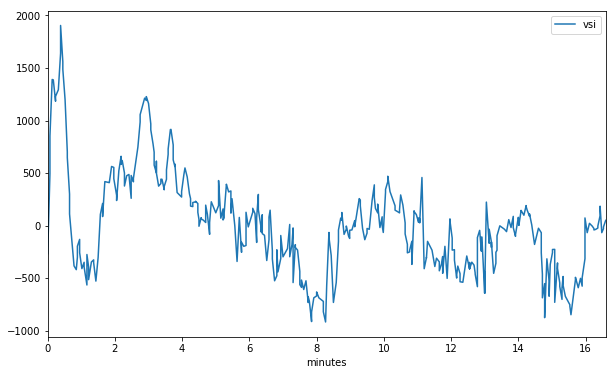

In [4]:
vsi.plot(x='minutes', y='vsi', figsize=(10,6))

## Smooth the Data

Transform the data:

* Round the minutes to one decimal place.
* Group the VSI values by minute value (tenths of a minute).
* Calculate the mean of each group.

In [5]:
t = vsi.round(1).groupby(['minutes'])[['vsi']].mean()
t.head(10)

,vsi
minutes,
0.0,-267.000000
0.1,993.600000
0.2,1283.600000
0.3,1293.000000
0.4,1647.750000
0.5,1200.000000
0.6,402.857143
0.8,-395.000000
0.9,-248.500000


The plot looks nicer now

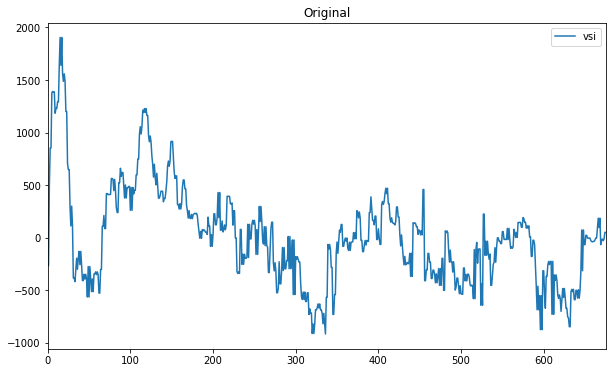

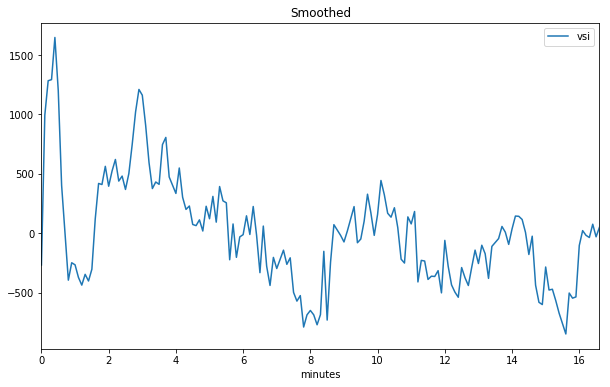

In [6]:
vsi.plot(y='vsi', title='Original', figsize=(10,6))
plt.show()
t.plot(title='Smoothed', figsize=(10,6))
plt.show()